In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
plt.rcParams.update({'font.size': 14})
import seaborn as sns
sns.set_style("darkgrid")

In [73]:
bytes = [100, 512, 1024, 8192, 32768, 524288, 1048576]
x_axis = [i for i in range(len(bytes))]
labels = [f"{0.1 if b == 100 else b / 1024} KB" for b in bytes]
ms = 50
barwidth = 0.4
target_x_axis = [x_axis[0]-(barwidth/2)]
for i in x_axis:
    target_x_axis.append(i)
target_x_axis.append(x_axis[-1]+barwidth+(barwidth/2))
target = [ms for _ in target_x_axis]

In [47]:
processes = [50, 50, 50, 50, 50, 55, 60]
subinterpreters = [50, 50, 50, 50, 50, 50, 51]

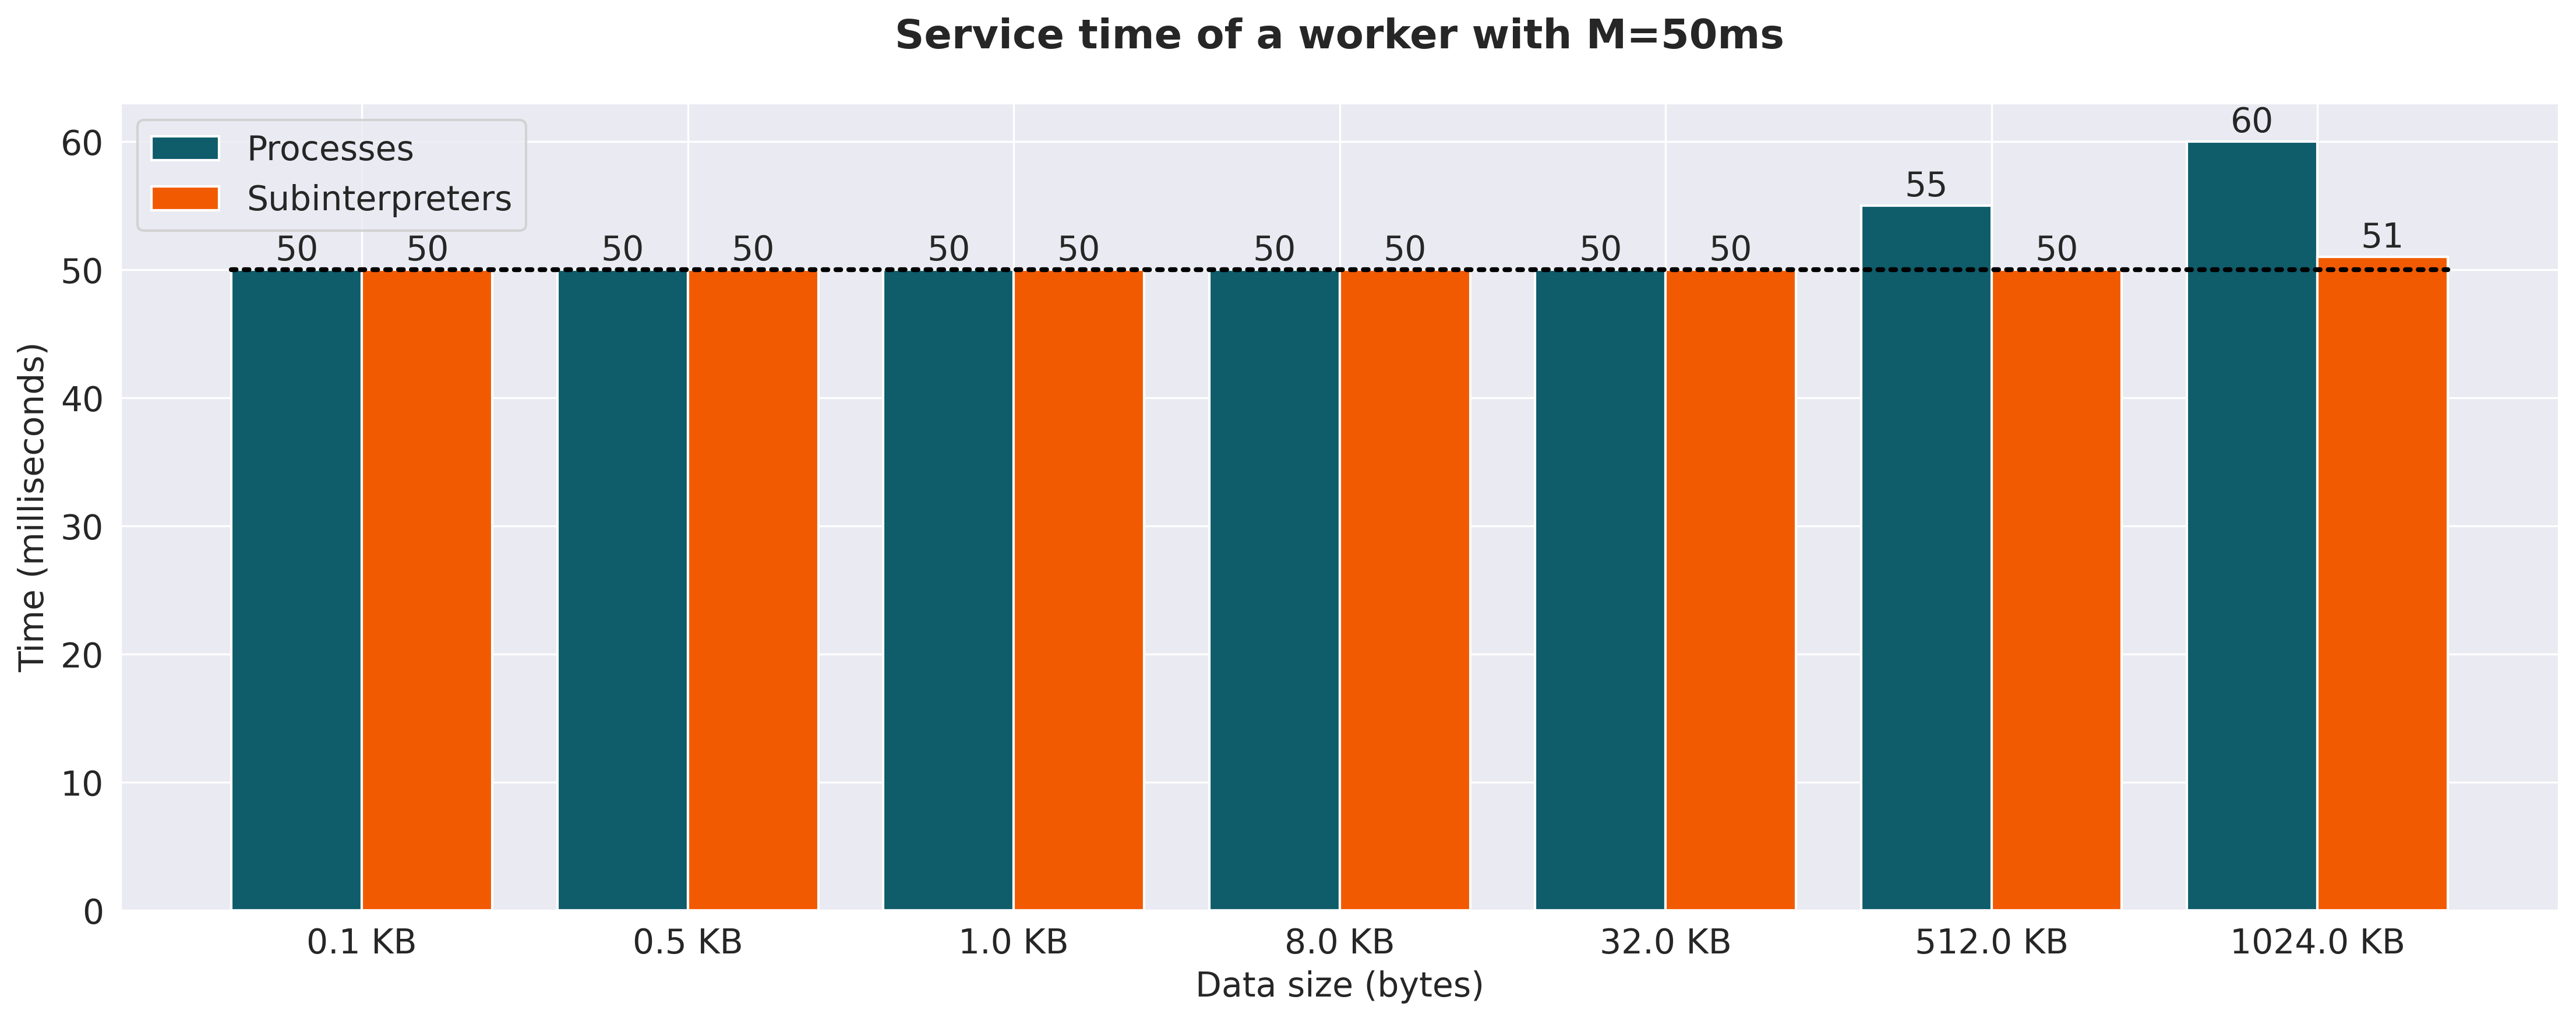

In [86]:
fig, axs = plt.subplots(figsize=(18, 6), dpi=300)
colors = ["#A0D2DB", "#188FA7", "#0F5C6B", "#F25A02"]
bar1 = plt.bar(x_axis, processes, barwidth, label="Processes", color=colors[2])
bar2 = plt.bar([i + barwidth for i in x_axis], subinterpreters, barwidth, label="Subinterpreters", color=colors[3])
plt.plot(target_x_axis, target, linewidth=2, linestyle = 'dotted', color="black")[0].set_dash_capstyle('round')
#axs.annotate(xy=(target_x_axis[-1],target[-1]), xytext=(5,0), textcoords='offset points', text="T", va='center')

# Add counts above the two bar graphs
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height+0.2, f'{height:.0f}', ha='center', va='bottom')


axs.set_xlabel("Data size (bytes)")
axs.set_ylabel("Time (milliseconds)")
plt.xticks([i + barwidth / 2 for i in x_axis], labels=labels)

plt.title('Service time of a worker with M=50ms', fontweight="bold", y=1.05)
plt.legend()

#plt.savefig("with-numpy", bbox_inches="tight")
plt.show()